In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('filmtv_movies.csv')
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [3]:
# Take values only year after 1999 in the column 'year'
df = df[df['year'] > 1999]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20820 entries, 1698 to 40298
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     20820 non-null  int64  
 1   title         20820 non-null  object 
 2   year          20820 non-null  int64  
 3   genre         20772 non-null  object 
 4   duration      20820 non-null  int64  
 5   country       20813 non-null  object 
 6   directors     20800 non-null  object 
 7   actors        19305 non-null  object 
 8   avg_vote      20820 non-null  float64
 9   critics_vote  16950 non-null  float64
 10  public_vote   20492 non-null  float64
 11  total_votes   20820 non-null  int64  
 12  description   20631 non-null  object 
 13  notes         8159 non-null   object 
 14  humor         20820 non-null  int64  
 15  rhythm        20820 non-null  int64  
 16  effort        20820 non-null  int64  
 17  tension       20820 non-null  int64  
 18  erotism       20820 non

In [5]:
df.isnull().sum()

filmtv_id           0
title               0
year                0
genre              48
duration            0
country             7
directors          20
actors           1515
avg_vote            0
critics_vote     3870
public_vote       328
total_votes         0
description       189
notes           12661
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64

In [6]:
# Drop columns 'description' and 'notes' 
df.drop(['description', 'notes'], axis=1, inplace=True)
# Drop rows of columns 'actors', 'public_votes' and 'critics_votes' with null values
df.dropna(subset=['actors', 'public_vote', 'critics_vote'], inplace=True)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15412 entries, 1698 to 40294
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     15412 non-null  int64  
 1   title         15412 non-null  object 
 2   year          15412 non-null  int64  
 3   genre         15373 non-null  object 
 4   duration      15412 non-null  int64  
 5   country       15409 non-null  object 
 6   directors     15400 non-null  object 
 7   actors        15412 non-null  object 
 8   avg_vote      15412 non-null  float64
 9   critics_vote  15412 non-null  float64
 10  public_vote   15412 non-null  float64
 11  total_votes   15412 non-null  int64  
 12  humor         15412 non-null  int64  
 13  rhythm        15412 non-null  int64  
 14  effort        15412 non-null  int64  
 15  tension       15412 non-null  int64  
 16  erotism       15412 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 2.1+ MB


In [7]:
# Removing the duplicates if any
duplicates = df.duplicated()
print(duplicates)
print("Number of duplicates:", duplicates.sum())
df.drop_duplicates(inplace=True)

1698     False
12186    False
12273    False
12298    False
12300    False
         ...  
40277    False
40278    False
40284    False
40286    False
40294    False
Length: 15412, dtype: bool
Number of duplicates: 0


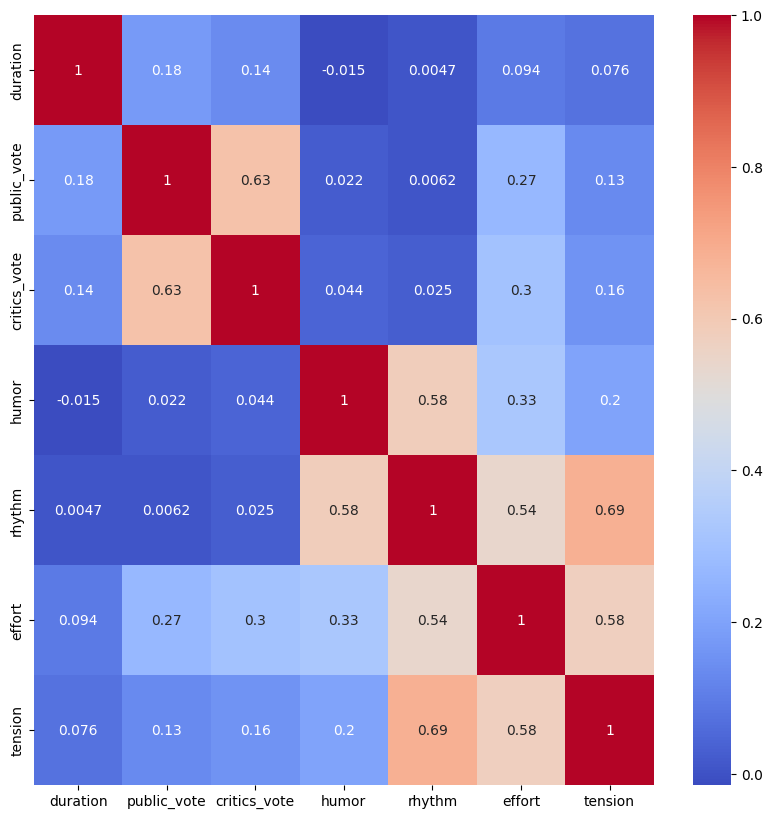

In [8]:
# Make a df_corr with columns 'public_vote', 'critics_vote', 'duration', 'year' , 'humor', 'rythom' , 'effort', 'effort', 'tension' 
df_corr = df[['year','duration','public_vote', 'critics_vote'  , 'humor', 'rhythm', 'effort', 'tension']]
# set index to 'year'
df_corr.set_index('year', inplace=True)
# Make a correlation matrix
corr = df_corr.corr()
# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Making a new row for movies with mutiple directors
# loop through each row in the dataframe
for index, row in df.iterrows():
    # check if the "directors" column contains multiple directors
    if ',' in str(row['directors']):
        # split the directors into a list
        directors_list = row['directors'].split(',')
        # update the "directors" column with the first director
        df.at[index, 'directors'] = directors_list[0].strip()
        # add a new row for each additional director
        for director in directors_list[1:]:
            # check if the value is not NaN
            if not pd.isna(director):
                new_row = row.copy()
                new_row['directors'] = director.strip() # set the director for the new row
                df = df.append(new_row) # add the new row to the original dataframe

# reset the index of the modified dataframe
df.reset_index(drop=True, inplace=True)

/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_3623/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row) # add the new row to the original dataframe
/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_3623/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row) # add the new row to the original dataframe
/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_3623/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row) # add the new row to the original dataframe
/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_3623/1695506513.py:16: FutureWarning: The frame.append method is deprecated and will b

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16514 entries, 0 to 16513
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     16514 non-null  int64  
 1   title         16514 non-null  object 
 2   year          16514 non-null  int64  
 3   genre         16474 non-null  object 
 4   duration      16514 non-null  int64  
 5   country       16511 non-null  object 
 6   directors     16502 non-null  object 
 7   actors        16514 non-null  object 
 8   avg_vote      16514 non-null  float64
 9   critics_vote  16514 non-null  float64
 10  public_vote   16514 non-null  float64
 11  total_votes   16514 non-null  int64  
 12  humor         16514 non-null  int64  
 13  rhythm        16514 non-null  int64  
 14  effort        16514 non-null  int64  
 15  tension       16514 non-null  int64  
 16  erotism       16514 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 2.1+ MB


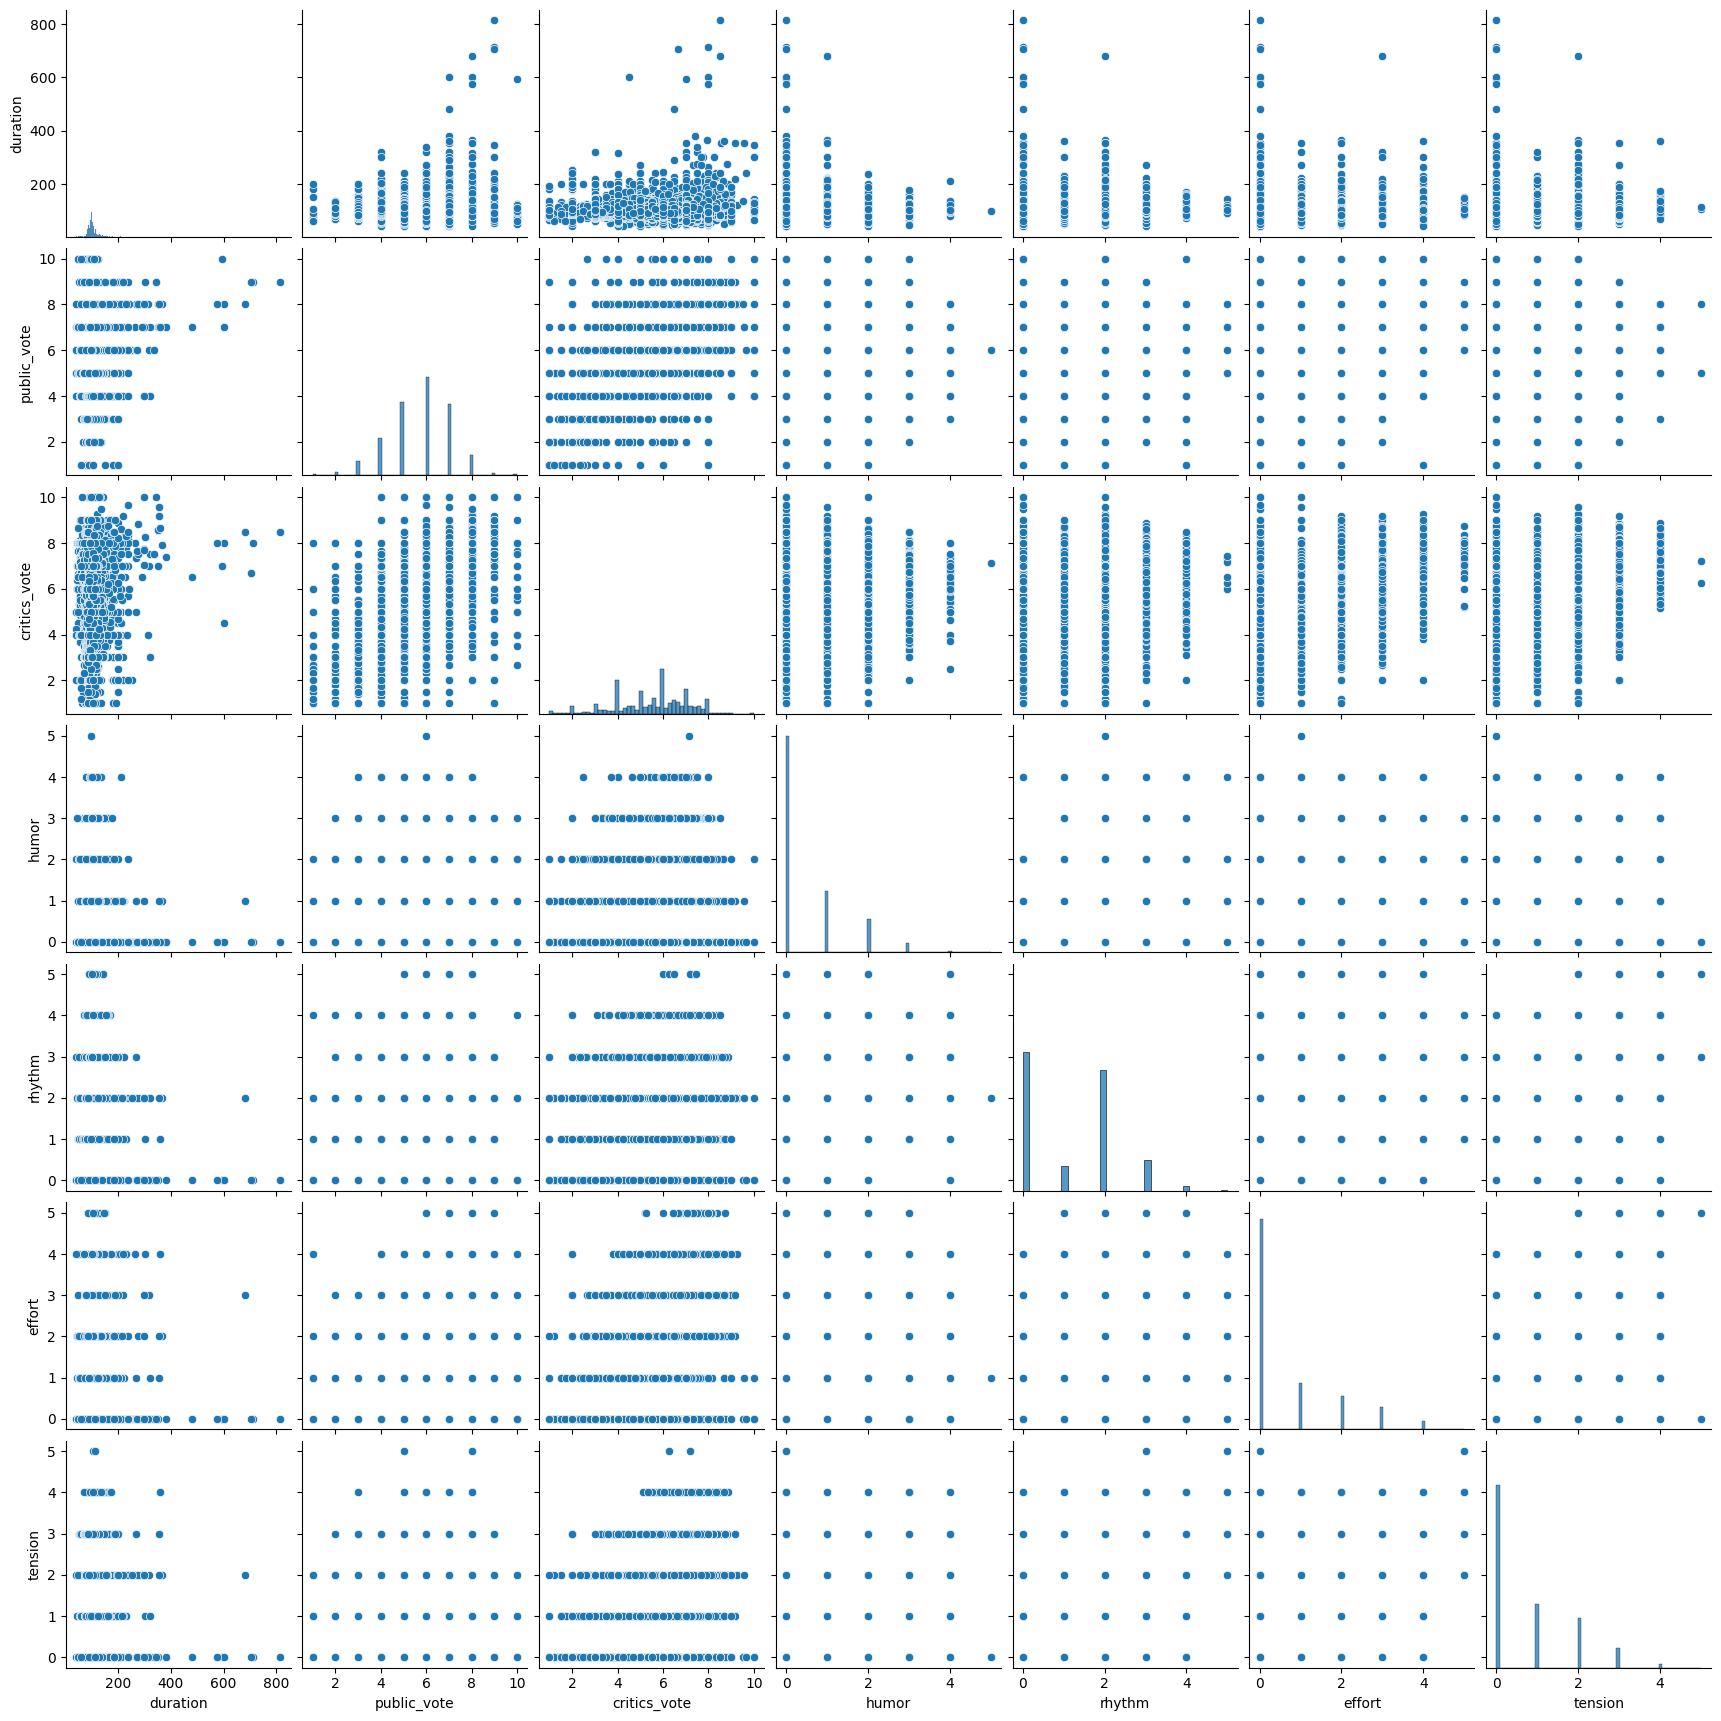

In [11]:
# Plotting the pairplot
sns.pairplot(df_corr)
plt.show()

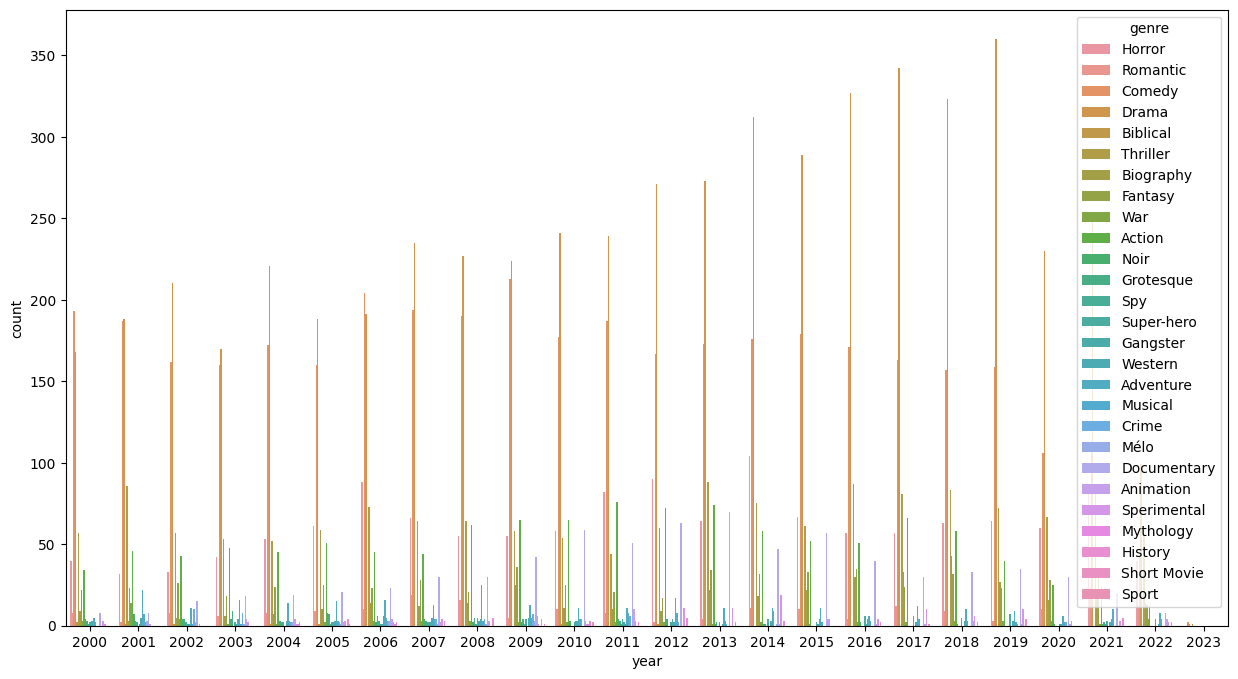

In [12]:
# Draw a plot to show total movies released in each year with hue as 'genre'
plt.figure(figsize=(15, 8))
sns.countplot(x='year', hue='genre', data=df)
plt.show()

In [13]:
# Create a Column with avg_rating as average of avg_vote, critics_vote and public_vote
df['avg_rating'] = (df['avg_vote'] + df['critics_vote'] + df['public_vote'])/3
df['avg_rating'].describe()

count    16514.000000
mean         5.653837
std          1.298060
min          1.000000
25%          4.800000
50%          5.790000
75%          6.610000
max         10.000000
Name: avg_rating, dtype: float64

In [14]:
# Calculate the average rating of each genre
df.groupby('genre')['avg_rating'].mean()
# Calculate which genre has the highest average rating and which has the lowest
print("Highest average rating:", df.groupby('genre')['avg_rating'].mean().idxmax())
print("Lowest average rating:", df.groupby('genre')['avg_rating'].mean().idxmin())

Highest average rating: Short Movie
Lowest average rating: Biblical


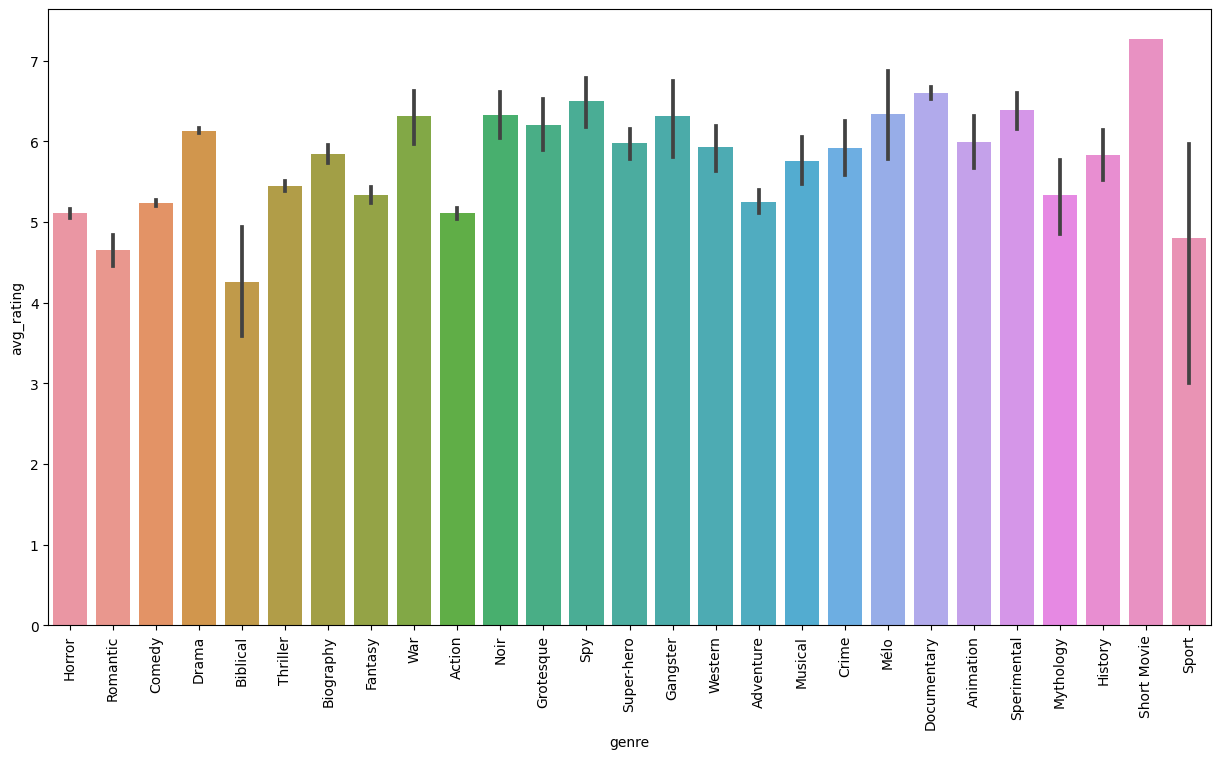

In [15]:
# Plot a barplot to show the average rating of each genre and represent the x values as vertical
plt.figure(figsize=(15, 8))
sns.barplot(x='genre', y='avg_rating', data=df)
plt.xticks(rotation=90)
plt.show()

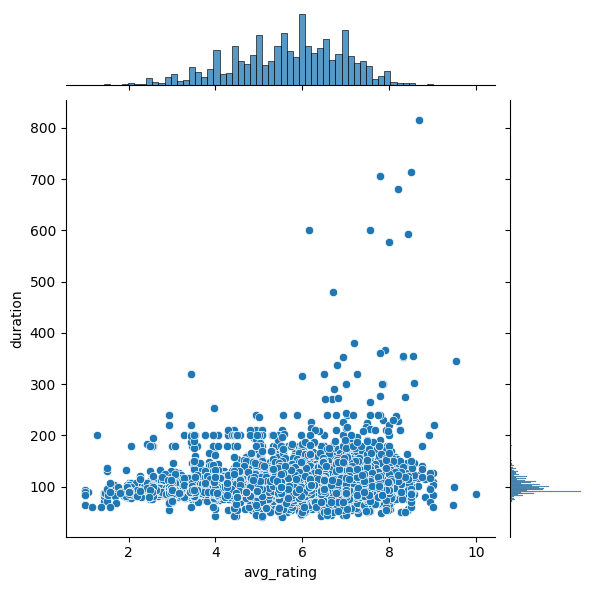

In [16]:
# Check if there is any relationship between the average rating and the duration of the movie
sns.jointplot(x='avg_rating', y='duration', data=df)
plt.show()

In [17]:
# Top 10 director with highest average rating
df.groupby('directors')['avg_rating'].mean().sort_values(ascending=False).head(10)

directors
Peter Watkins           9.533333
Catarina Vasconcelos    9.500000
Gregory Colbert         9.466667
Jorge Gaggero           9.000000
Federico Sfascia        8.933333
Shahram Mokri           8.933333
Amit Dutta              8.933333
Brett Gaylor            8.823333
David Easteal           8.766667
Feo Aladag              8.766667
Name: avg_rating, dtype: float64

In [18]:
# Top 10 director with highest number of movies
df['directors'].value_counts().head(10)

Alberto Sironi       40
Takashi Miike        36
Carlo Vanzina        27
Steven Soderbergh    26
Pupi Avati           22
Kim Ki-duk           22
Sion Sono            21
Roan Johnson         21
Sang-soo Hong        20
Woody Allen          20
Name: directors, dtype: int64

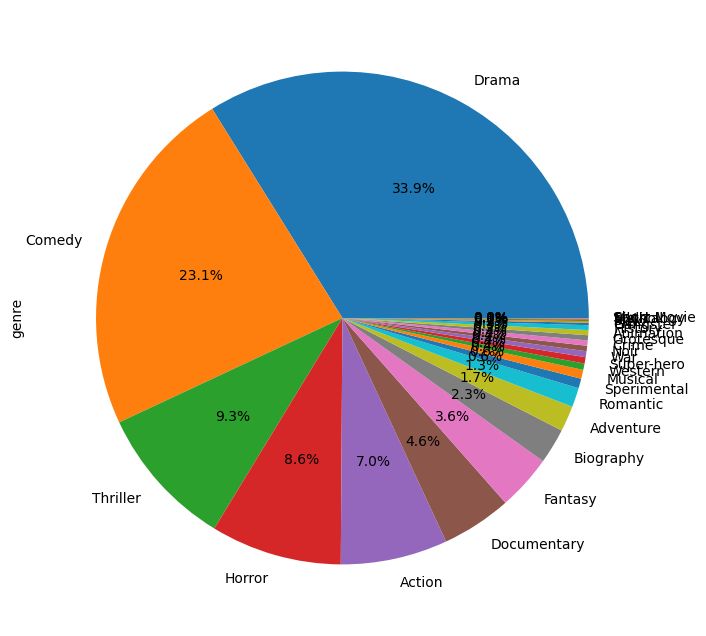

In [19]:
# Plot a pie chart to show the percentage of movies in each genre and adjust the text label as vertical
plt.figure(figsize=(15, 8))
df['genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [20]:
# Print the Most popular of each genre based on avg_rating
for genre in df['genre'].unique():
    genre_movies = df[df['genre'] == genre].sort_values(by='avg_rating', ascending=False)
    if not genre_movies.empty and genre_movies.index.max() >= 0:
        print("Most popular", genre, "movie is", genre_movies['title'].iloc[0])

Most popular Horror movie is Sorgoï Prakov, My European Dream
Most popular Romantic movie is Hua yang nian hua
Most popular Comedy movie is I rec u
Most popular Drama movie is La commune (Paris, 1871)
Most popular Biblical movie is The Passion of the Christ
Most popular Thriller movie is The Missing
Most popular Biography movie is The Irishman
Most popular Fantasy movie is Serpentário
Most popular War movie is Apocalypse Now: Redux
Most popular Action movie is Ninja: Shadow of a Tear
Most popular Noir movie is Mulholland Drive
Most popular Grotesque movie is Sílení
Most popular Spy movie is The Missing Person
Most popular Super-hero movie is The Dark Knight
Most popular Gangster movie is The Departed
Most popular Western movie is Django Unchained
Most popular Adventure movie is El Abrazo de la Serpiente
Most popular Musical movie is Can't Stand Losing You
Most popular Crime movie is Wu jian dao 3
Most popular Mélo movie is Hable con ella
Most popular Documentary movie is Rembrandt's J'

In [21]:
# Make a new dataframe with columns as 'Most Popular Movie', 'Genre', 'Director', 'Year', 'Duration', 'Avg Rating'
df_popular = pd.DataFrame(columns=['Most Popular Movie', 'Genre', 'Director', 'Year', 'Duration', 'Avg Rating'])
# Loop through each genre
for genre in df['genre'].unique():
    genre_movies = df[df['genre'] == genre].sort_values(by='avg_rating', ascending=False)
    if not genre_movies.empty and genre_movies.index.max() >= 0:
        # Add a row to the dataframe with the details of the most popular movie of each genre
        df_popular = df_popular.append({'Most Popular Movie': genre_movies['title'].iloc[0], 'Genre': genre, 'Director': genre_movies['directors'].iloc[0], 'Year': genre_movies['year'].iloc[0], 'Duration': genre_movies['duration'].iloc[0], 'Avg Rating': genre_movies['avg_rating'].iloc[0]}, ignore_index=True)
# Print the dataframe
df_popular

/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_3623/2836496801.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_popular = df_popular.append({'Most Popular Movie': genre_movies['title'].iloc[0], 'Genre': genre, 'Director': genre_movies['directors'].iloc[0], 'Year': genre_movies['year'].iloc[0], 'Duration': genre_movies['duration'].iloc[0], 'Avg Rating': genre_movies['avg_rating'].iloc[0]}, ignore_index=True)
/var/folders/81/7lgztltx67d37zy072b6bcsw0000gn/T/ipykernel_3623/2836496801.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_popular = df_popular.append({'Most Popular Movie': genre_movies['title'].iloc[0], 'Genre': genre, 'Director': genre_movies['directors'].iloc[0], 'Year': genre_movies['year'].iloc[0], 'Duration': genre_movies['duration'].iloc[0], 'Avg Rating': genre_movies['avg_ra

,Most Popular Movie,Genre,Director,Year,Duration,Avg Rating
0,"Sorgoï Prakov, My European Dream",Horror,Rafaël Cherkaski,2013,92,8.500000
1,Hua yang nian hua,Romantic,Wong Kar-wai,2000,98,8.360000
2,I rec u,Comedy,Federico Sfascia,2015,116,8.933333
3,"La commune (Paris, 1871)",Drama,Peter Watkins,2000,345,9.533333
4,The Passion of the Christ,Biblical,Mel Gibson,2004,126,5.806667
5,The Missing,Thriller,NaN,2014,137,8.533333
6,The Irishman,Biography,Martin Scorsese,2019,210,8.243333
7,Serpentário,Fantasy,Carlos Conceição,2019,83,8.500000
8,Apocalypse Now: Redux,War,Francis Ford Coppola,2000,200,8.926667
9,Ninja: Shadow of a Tear,Action,Isaac Florentine,2013,95,8.933333


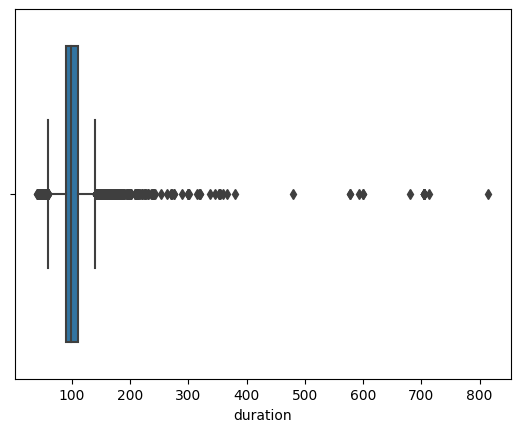

Interquartile range: 20.0
Lower bound: 60.0
Upper bound: 140.0
Number of outliers: 752


In [22]:
# Are there any outliers in the duration of movies in the dataset? Use a box plot to visualize the distribution and calculate the interquartile range and identify any outliers.
sns.boxplot(x=df['duration'])
plt.show()
# Calculate the interquartile range
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile range:", IQR)
# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
# Check if there are any outliers
print("Number of outliers:", df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)].shape[0])


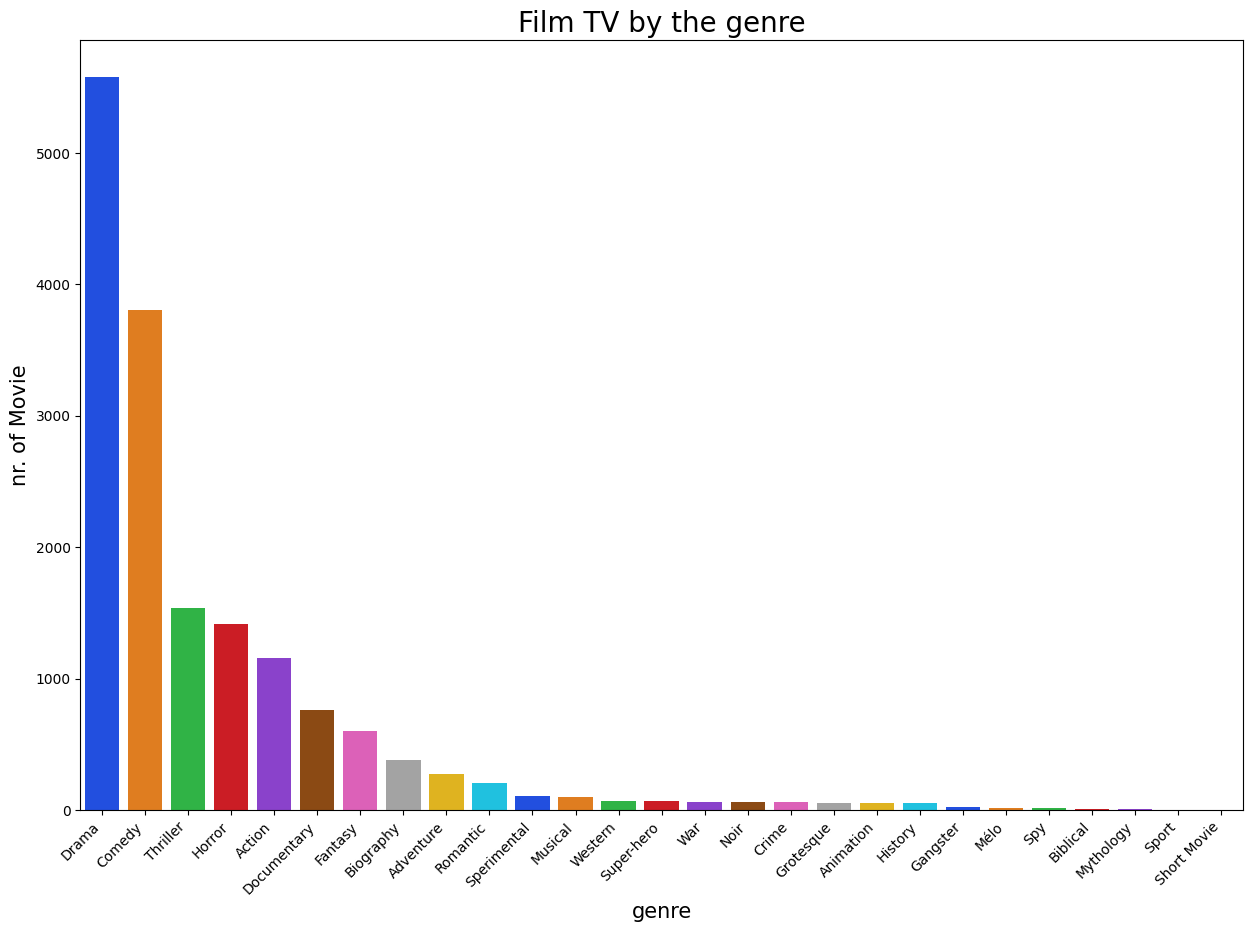

In [23]:
plt.figure(figsize=(15,10))
plt.title('Film TV by the genre', size=20)
sns.barplot(x=df.genre.value_counts().index, y=df.genre.value_counts(), palette="bright")
plt.ylabel('nr. of Movie', size=15)
plt.xlabel('genre',size=15)
plt.xticks(rotation=45, ha='right')
plt.show()